In [1]:
import matplotlib.pyplot as plt
import corner as corner
import pandas as pd
import numpy as np
import h5py
import torch
import time
import matplotlib.transforms
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import CubicSpline

import sys
sys.path.append('../')
from populations.bbh_models import get_models
import populations.bbh_models as read_models
from populations.utils.flow import NFlow
from populations.Flowsclass_dev import FlowModel
from populations import gw_obs

/data/wiay/2297403c/conda_envs/amaze/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path='/data/wiay/2297403c/models_reduced.hdf5'

#CE channel
samples_dict = read_models.read_hdf5(file_path, 'CE')
sensitivity ='midhighlatelow_network'
alpha = np.zeros((4,5))
mass = np.zeros((4,5))
mass_power = np.zeros((4,5))
redshift = np.zeros((4,5))
chi_b=['0.','0.1','0.2','0.5']

for chib_id in range(4):
    for alphaCE_id in range(5):
        samples = samples_dict[(chib_id,alphaCE_id)]
        mock_samp = samples.sample(int(1e6), weights=(samples['weight']/len(samples)), replace=True)
        alpha[chib_id,alphaCE_id] = np.sum(mock_samp['pdet_'+sensitivity]) / len(mock_samp)
        mass_power[chib_id,alphaCE_id] = np.mean(samples['mchirp']**(5/6))
        mass[chib_id,alphaCE_id] = np.mean(samples['mchirp'])
        redshift[chib_id,alphaCE_id] = np.mean(samples['z'])

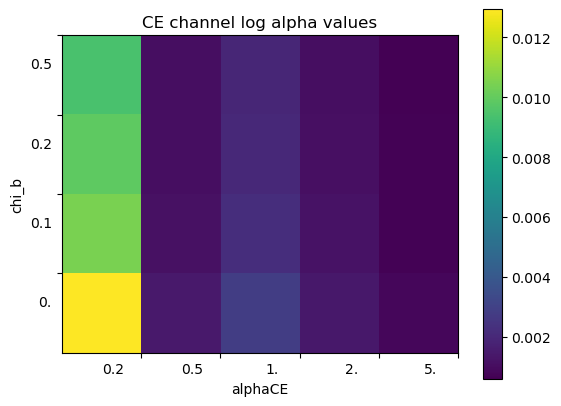

In [4]:
#plot CE channel
fig,ax=plt.subplots(1,1)

plt.rcParams["figure.figsize"] = (7,7)
plt.imshow((alpha), extent=(0,5,0,4))
plt.colorbar()
plt.title('CE channel log alpha values')
plt.xlabel('alphaCE')
plt.ylabel('chi_b')

ax.set_yticks([1,2,3,4])
ax.set_yticklabels(chi_b)
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['0.2','0.5','1.','2.', '5.'])
dx = 0/72.; dy = -20/72. 
offsety = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsety)
dxx = -20/72.; dyx = 0/72.
offsetx = matplotlib.transforms.ScaledTranslation(dxx, dyx, fig.dpi_scale_trans)
for label in ax.xaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsetx)

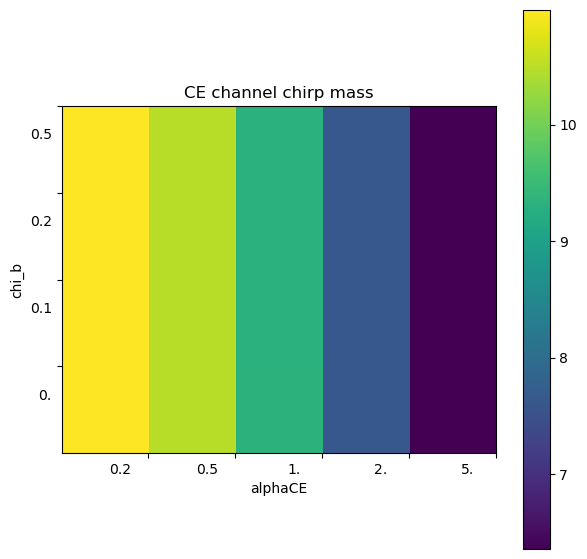

In [13]:
#plot CE channel mass
fig,ax=plt.subplots(1,1)

plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(mass, extent=(0,5,0,4))
plt.colorbar()
plt.title('CE channel chirp mass')
plt.xlabel('alphaCE')
plt.ylabel('chi_b')

ax.set_yticks([1,2,3,4])
ax.set_yticklabels(chi_b)
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['0.2','0.5','1.','2.', '5.'])
dx = 0/72.; dy = -20/72. 
offsety = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsety)
dxx = -20/72.; dyx = 0/72.
offsetx = matplotlib.transforms.ScaledTranslation(dxx, dyx, fig.dpi_scale_trans)
for label in ax.xaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsetx)

In [18]:
redshift

array([[1.03999575, 1.30833841, 1.22141677, 1.22930752, 1.1210554 ],
       [1.04288562, 1.30929326, 1.22036195, 1.22985734, 1.12078024],
       [1.04196885, 1.31056786, 1.22269207, 1.23312675, 1.11899717],
       [1.0416447 , 1.30718448, 1.22133035, 1.22813927, 1.1219175 ]])

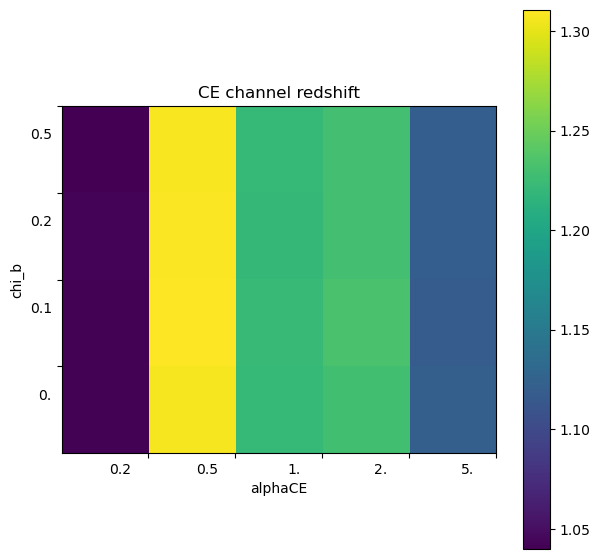

In [7]:
#plot CE channel redshift
fig,ax=plt.subplots(1,1)

plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(redshift, extent=(0,5,0,4))
plt.colorbar()
plt.title('CE channel redshift')
plt.xlabel('alphaCE')
plt.ylabel('chi_b')

ax.set_yticks([1,2,3,4])
ax.set_yticklabels(chi_b)
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['0.2','0.5','1.','2.', '5.'])
dx = 0/72.; dy = -20/72. 
offsety = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsety)
dxx = -20/72.; dyx = 0/72.
offsetx = matplotlib.transforms.ScaledTranslation(dxx, dyx, fig.dpi_scale_trans)
for label in ax.xaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsetx)

In [29]:
print(mass)
print(1+redshift)
print(dL)
((mass*(1+redshift))**(5/6))/np.asarray(dL)

[[18.02517958 17.13094523 14.87909516 11.71025972  9.42938119]
 [18.01612167 17.13955668 14.88985104 11.70852189  9.42462041]
 [18.01674975 17.12918734 14.88552678 11.70943888  9.42634178]
 [18.02637202 17.13729224 14.90118643 11.71686713  9.43496767]]
[[2.03999575 2.30833841 2.22141677 2.22930752 2.1210554 ]
 [2.04288562 2.30929326 2.22036195 2.22985734 2.12078024]
 [2.04196885 2.31056786 2.22269207 2.23312675 2.11899717]
 [2.0416447  2.30718448 2.22133035 2.22813927 2.1219175 ]]
[[6960.84452985 9190.15816357 8457.12593278 8523.26793625 7623.37111443]
 [6984.28585986 9198.26341963 8448.29050598 8527.87970756 7621.10502938]
 [6976.8479526  9209.08449479 8467.81016641 8555.3111694  7606.42366302]
 [6974.21841609 9180.36458067 8456.40201599 8513.47014432 7630.4714435 ]] Mpc


array([[0.00289687, 0.00233119, 0.00218164, 0.00177831, 0.00159239],
       [0.00288934, 0.00233091, 0.00218437, 0.00177749, 0.00159202],
       [0.00289143, 0.00232807, 0.00218071, 0.00177408, 0.00159422],
       [0.00289342, 0.00233342, 0.00218445, 0.00178042, 0.00159223]])

[[6960.84452985 9190.15816357 8457.12593278 8523.26793625 7623.37111443]
 [6984.28585986 9198.26341963 8448.29050598 8527.87970756 7621.10502938]
 [6976.8479526  9209.08449479 8467.81016641 8555.3111694  7606.42366302]
 [6974.21841609 9180.36458067 8456.40201599 8513.47014432 7630.4714435 ]] Mpc


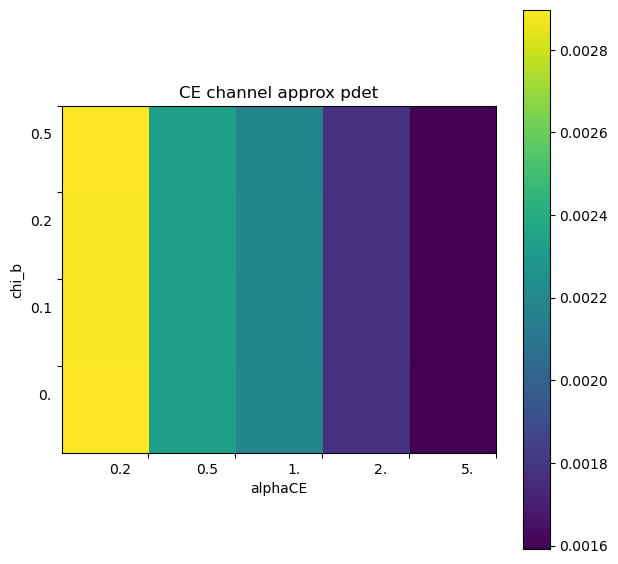

In [30]:
#plot pdet as combination of mass, redshift, luminosity distance. but approximations wrong
import astropy.cosmology
from astropy.cosmology import Planck18, LambdaCDM
LVKuniverse = LambdaCDM(67.9, 0.365, 0.6935)

dL = LVKuniverse.luminosity_distance(redshift)
approx_pdet = ((mass*(1+redshift))**(5/6))/np.asarray(dL)

fig,ax=plt.subplots(1,1)

plt.rcParams["figure.figsize"] = (7,7)
plt.imshow(approx_pdet, extent=(0,5,0,4))
plt.colorbar()
plt.title('CE channel approx pdet')
plt.xlabel('alphaCE')
plt.ylabel('chi_b')

ax.set_yticks([1,2,3,4])
ax.set_yticklabels(chi_b)
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(['0.2','0.5','1.','2.', '5.'])
dx = 0/72.; dy = -20/72. 
offsety = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsety)
dxx = -20/72.; dyx = 0/72.
offsetx = matplotlib.transforms.ScaledTranslation(dxx, dyx, fig.dpi_scale_trans)
for label in ax.xaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsetx)
print(dL)

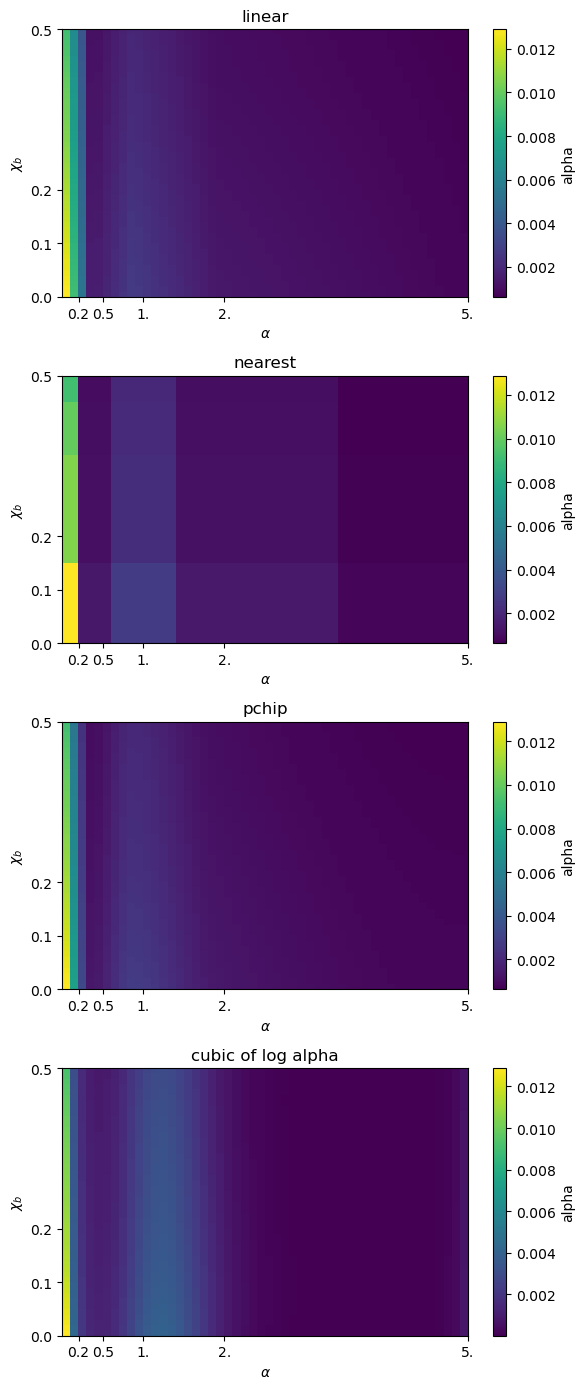

In [14]:
#interpolating alpha values

plt.rcParams["figure.figsize"] = (6,14)
fig2, ax2 = plt.subplots(4,1)

grid_new_res = 50
chi_b=[0.,0.1,0.2,0.5]
alphaCE=[0.2,0.5,1.,2.,5.]
grid_new = np.meshgrid(np.linspace(chi_b[0],chi_b[-1], grid_new_res),np.linspace(alphaCE[0],alphaCE[-1],grid_new_res))
grid = np.meshgrid(chi_b,alphaCE)
#grid = np.meshgrid([0,1,2,3,4],[0,1,2,3])

for i, interp_method in enumerate(['linear','nearest','pchip', 'cubic']):
    
    if i==3:
        f = RegularGridInterpolator((chi_b,alphaCE), np.log(alpha), bounds_error=False, fill_value=None, method=interp_method)
        contour=ax2[i].imshow(np.swapaxes(np.exp(f((grid_new[0],grid_new[1]))),0,1), extent=(0,5,0,0.5), aspect='auto')
        ax2[i].set_title('cubic of log alpha')
    else:
        f = RegularGridInterpolator((chi_b,alphaCE), alpha, bounds_error=False, fill_value=None, method=interp_method)
        contour=ax2[i].imshow(np.swapaxes(f((grid_new[0],grid_new[1])),0,1), extent=(0,5,0,0.5), aspect='auto')
        ax2[i].set_title(interp_method)

    #ax2[i].plot(grid[0],grid[1], 'o', color='black')
    ax2[i].set_ylabel(fr'$\chi_b$')
    ax2[i].set_xlabel(r'$\alpha$')
    ax2[i].set_yticks([0,.1,.2,.5])
    ax2[i].set_yticklabels(chi_b)
    ax2[i].set_xticks([0.2,0.5,1,2,5])
    ax2[i].set_xticklabels(['0.2','0.5','1.','2.', '5.'])
    fig2.colorbar(contour, ax=ax2[i], label=r'alpha')

plt.tight_layout()
plt.show()

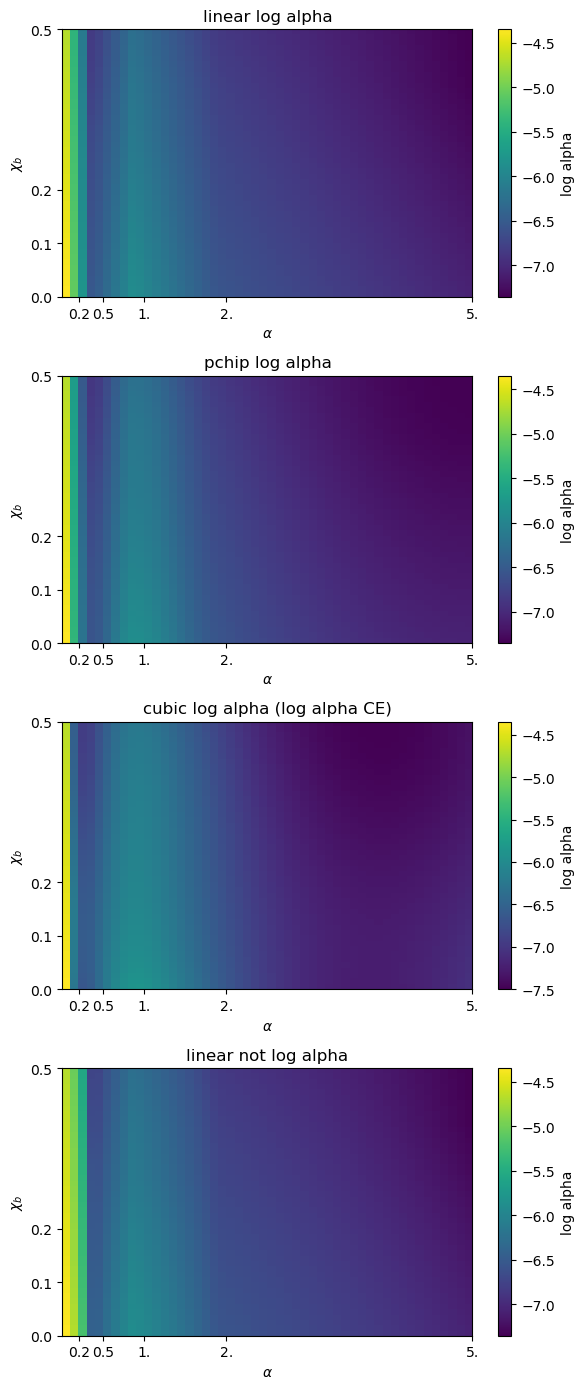

In [3]:
#interpolating alpha values

plt.rcParams["figure.figsize"] = (6,14)
fig2, ax2 = plt.subplots(4,1)

grid_new_res = 50
chi_b=[0.,0.1,0.2,0.5]
alphaCE=[0.2,0.5,1.,2.,5.]
grid_new = np.meshgrid(np.linspace(chi_b[0],chi_b[-1], grid_new_res),np.linspace(alphaCE[0],alphaCE[-1],grid_new_res))
grid = np.meshgrid(chi_b,alphaCE)
#grid = np.meshgrid([0,1,2,3,4],[0,1,2,3])

for i, interp_method in enumerate(['linear', 'pchip']):
    
    f = RegularGridInterpolator((chi_b,alphaCE), np.log(alpha), bounds_error=False, fill_value=None, method=interp_method)
    contour=ax2[i].imshow(np.swapaxes(f((grid_new[0],grid_new[1])),0,1), extent=(0,5,0,0.5), aspect='auto')
    ax2[i].set_title(f'{interp_method} log alpha')
    fig2.colorbar(contour, ax=ax2[i], label=r'log alpha')


f = RegularGridInterpolator((chi_b,np.log(alphaCE)), np.log(alpha), bounds_error=False, fill_value=None, method='cubic')
contour=ax2[2].imshow(np.swapaxes(f((grid_new[0],np.log(grid_new[1]))),0,1), extent=(0,5,0,0.5), aspect='auto')
ax2[2].set_title(f'cubic log alpha (log alpha CE)')
fig2.colorbar(contour, ax=ax2[2], label=r'log alpha')

f = RegularGridInterpolator((chi_b,alphaCE), alpha, bounds_error=False, fill_value=None, method='linear')
contour=ax2[3].imshow(np.swapaxes(np.log(f((grid_new[0],grid_new[1]))),0,1), extent=(0,5,0,0.5), aspect='auto')
ax2[3].set_title('linear not log alpha')
fig2.colorbar(contour, ax=ax2[3], label=r'log alpha')

for i in range(4):
    #ax2[i].plot(grid[0],grid[1], 'o', color='black')
    ax2[i].set_ylabel(fr'$\chi_b$')
    ax2[i].set_xlabel(r'$\alpha$')
    ax2[i].set_yticks([0,.1,.2,.5])
    ax2[i].set_yticklabels(chi_b)
    ax2[i].set_xticks([0.2,0.5,1,2,5])
    ax2[i].set_xticklabels(['0.2','0.5','1.','2.', '5.'])


plt.tight_layout()
plt.show()

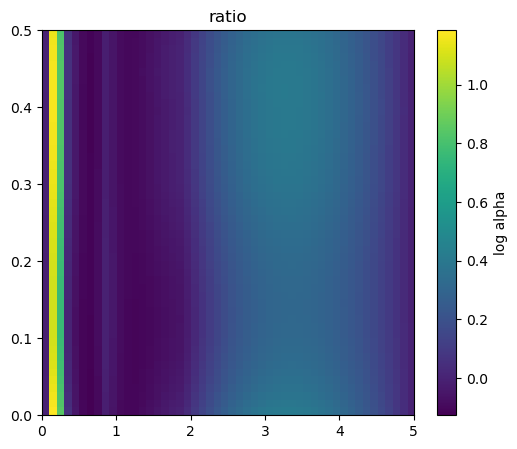

In [19]:
plt.rcParams["figure.figsize"] = (6,5)

linear = RegularGridInterpolator((chi_b,alphaCE), np.log(alpha), bounds_error=False, fill_value=None, method='linear')
cubic_logalphaCE = RegularGridInterpolator((chi_b,np.log(alphaCE)), np.log(alpha), bounds_error=False, fill_value=None, method='cubic')

contour=plt.imshow(np.swapaxes(linear((grid_new[0],grid_new[1]))-cubic_logalphaCE((grid_new[0],np.log(grid_new[1]))),0,1),\
     extent=(0,5,0,0.5), aspect='auto')
plt.title(f'ratio')
plt.colorbar(contour, label=r'log alpha')

In [2]:
#checking alpha interp from flows directly
params = ['mchirp','q', 'chieff', 'z']
channels =['CE']
file_path='/data/wiay/2297403c/models_reduced.hdf5'
chi_b=[0.,0.1,0.2,0.5]
alphaCE=[0.2,0.5,1.,2.,5.]

model_names, flow = read_models.get_models(file_path, channels, params, use_flows=True, device='cpu', \
    no_bins=[5], use_unityweights=False, sensitivity='midhighlatelow_network')


100%|██████████| 1/1 [00:49<00:00, 49.93s/it]


In [3]:
alpha_flow = np.zeros((50,50))
grid_new_res = 50

for i, chib in enumerate(np.linspace(chi_b[0],chi_b[-1], grid_new_res)):
    for j, a in enumerate(np.linspace(alphaCE[0],alphaCE[-1],grid_new_res)):
        alpha_flow[i,j] = flow['CE'].get_alpha([chib,a])


[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.009818

/tmp/ipykernel_1173098/2014692827.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha_flow[i,j] = flow['CE'].get_alpha([chib,a])


[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.0098182  0.0010884  0.0021146  0.00111968 0.00065879]
 [0.01048224 0.0011678  0.00229043 0.0011749  0.00070905]
 [0.01286794 0.00141833 0.00283799 0.00139003 0.00084072]]
[[0.00926934 0.00104333 0.00203061 0.00108048 0.00067009]
 [0.009818

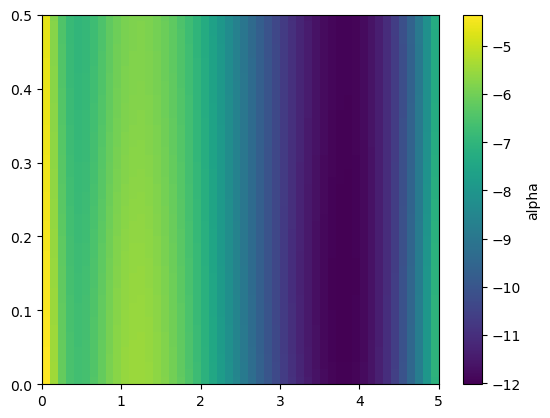

In [4]:
contour=plt.imshow(np.log(alpha_flow), extent=(0,5,0,0.5), aspect='auto')
plt.colorbar(contour, label=r'log alpha')
plt.xlabel()


[[ 0.00000000e+00  0.00000000e+00  4.33680869e-19 -2.16840434e-19
   0.00000000e+00]
 [-1.73472348e-18 -2.16840434e-19 -8.67361738e-19 -1.08420217e-18
   0.00000000e+00]
 [-1.73472348e-18  2.16840434e-19  0.00000000e+00 -6.50521303e-19
   0.00000000e+00]
 [ 0.00000000e+00 -2.16840434e-19  4.33680869e-19 -8.67361738e-19
   0.00000000e+00]]


"fig3.colorbar(contour, ax=ax2[i], label=r'alpha error')\nplt.tight_layout()\nplt.show()"

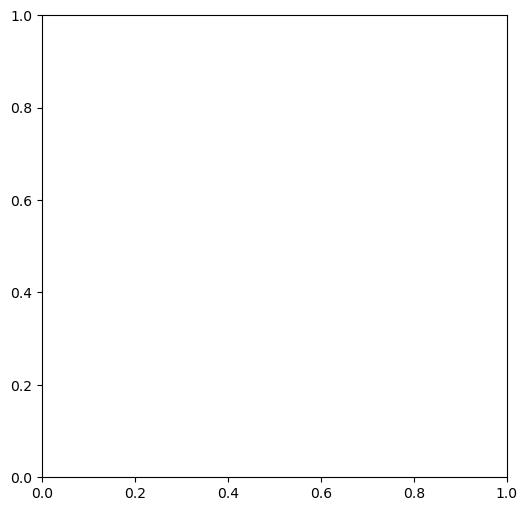

In [11]:
#error at points

plt.rcParams["figure.figsize"] = (6,6)
fig3, ax3 = plt.subplots(1,1)
f = RegularGridInterpolator((chi_b,alphaCE), alpha, bounds_error=False, fill_value=None, method='cubic')
print(np.swapaxes(f((grid[0],grid[1])),0,1)-alpha)
"""fig3.colorbar(contour, ax=ax2[i], label=r'alpha error')
plt.tight_layout()
plt.show()"""

In [3]:
#not CE channels
alpha_notCE = np.zeros((4,4))
mass_notCE = np.zeros((4,4))
mass_power_notCE = np.zeros((4,4))
redshift_notCE = np.zeros((4,4))
channels = ['CHE','GC','NSC','SMT']

channel_no = 0
for channel in channels:
    samples_dict = read_models.read_hdf5(file_path, channel)
    for chib_id in range(4):
            samples = samples_dict[(chib_id)]
            mock_samp = samples.sample(int(1e6), weights=(samples['weight']/len(samples)), replace=True)
            alpha_notCE[channel_no,chib_id] = np.sum(mock_samp['pdet_'+sensitivity]) / len(mock_samp)
            mass_notCE[channel_no,chib_id] = np.sum(mock_samp['mchirp']**(5/6)) / len(mock_samp)
            mass_power_notCE[channel_no,chib_id] = np.mean(mock_samp['mchirp']**(5/6))
            redshift_notCE[channel_no,chib_id] = np.mean(samples['z'])
            
    channel_no+=1


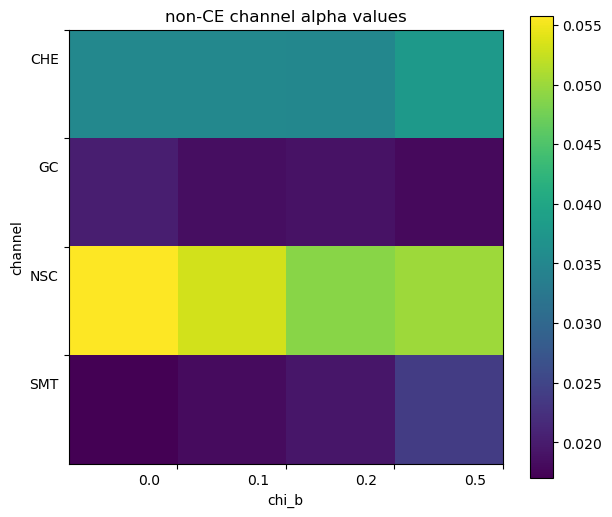

In [10]:
#plot not CE channels

plt.rcParams["figure.figsize"] = (7,6)
fig,ax=plt.subplots(1,1)
plt.imshow(alpha_notCE, extent=(0,4,0,4))
plt.colorbar()
plt.title('non-CE channel alpha values')
plt.xlabel('chi_b')
plt.ylabel('channel')

ax.set_yticks([1,2,3,4])
ax.set_yticklabels(np.flip(channels))
ax.set_xticks([1,2,3,4])
ax.set_xticklabels(chi_b)
dx = 0/72.; dy = -20/72. 
offsety = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
for label in ax.yaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsety)
dxx = -20/72.; dyx = 0/72.
offsetx = matplotlib.transforms.ScaledTranslation(dxx, dyx, fig.dpi_scale_trans)
for label in ax.xaxis.get_ticklabels():
    label.set_transform(label.get_transform() + offsetx)

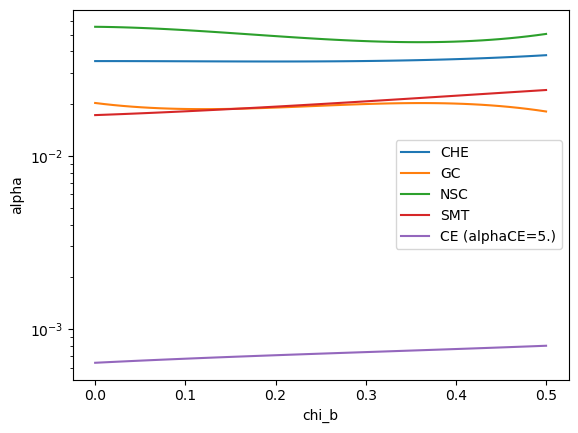

In [23]:
channel_no=0

chi_b=[0.,0.1,0.2,0.5]

for channel in channels:
    f = RegularGridInterpolator([chi_b], np.log(alpha_notCE[channel_no,:]), bounds_error=False, fill_value=None, method='cubic')
    log_alpha_interped = f(list(np.linspace(chi_b[0],chi_b[-1],50)))
    plt.plot(np.linspace(chi_b[0],chi_b[-1],50), np.exp(log_alpha_interped), label=channels[channel_no])
    #print(alpha_notCE[:,channel_no])
    channel_no+=1
plt.yscale('log')
f = RegularGridInterpolator([chi_b], np.log(alpha[:,-1]), bounds_error=False, fill_value=None, method='cubic')
plt.plot(np.linspace(chi_b[0],chi_b[-1],50), np.exp(f(np.linspace(chi_b[0],chi_b[-1],50))), label='CE (alphaCE=5.)')
plt.xlabel('chi_b')
plt.ylabel('alpha')
plt.legend()


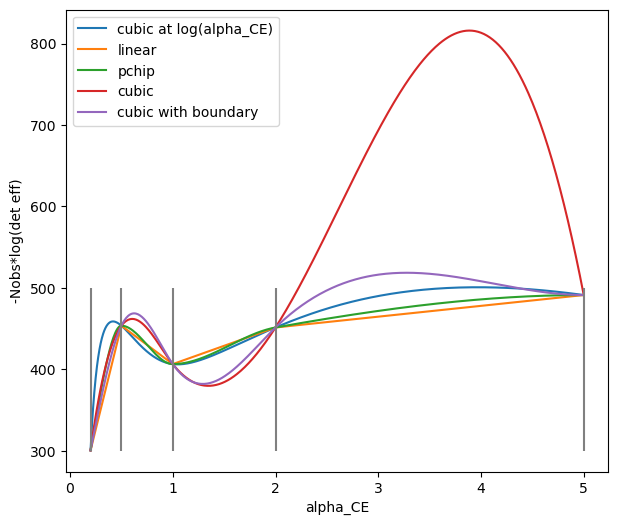

In [16]:
plt.rcParams["figure.figsize"] = (7,6)

alpha_CE=[0.2,0.5,1.,2.,5.]
f = RegularGridInterpolator([np.log(alpha_CE)], np.log(alpha[-1,:]), bounds_error=False, fill_value=None, method='cubic')
plt.plot(np.logspace(np.log10(alpha_CE[0]),np.log10(alpha_CE[-1]),500),\
     -69*(f(np.log(np.logspace(np.log10(alpha_CE[0]),np.log10(alpha_CE[-1]),500)))), label='cubic at log(alpha_CE)')


for i, interp_method in enumerate(['linear', 'pchip', 'cubic']):
     f = RegularGridInterpolator([alpha_CE], np.log(alpha[-1,:]), bounds_error=False, fill_value=None, method=interp_method)
     plt.plot(np.linspace(alpha_CE[0],alpha_CE[-1],500), -69*(f(np.linspace(alpha_CE[0],alpha_CE[-1],500))), label=interp_method)

f = RegularGridInterpolator([np.log(alpha_CE)], np.log(alpha[-1,:]), bounds_error=False, fill_value=None, method='linear')
#plt.plot(np.logspace(np.log10(alpha_CE[0]),np.log10(alpha_CE[-1]),500),\
#     -69*(f(np.log(np.logspace(np.log10(alpha_CE[0]),np.log10(alpha_CE[-1]),500)))), label='linear at log(alpha_CE)')

f = CubicSpline(alpha_CE, np.log(alpha[-1,:]), axis=0, bc_type=((2, 0.0), (1, 0.0)), extrapolate=None)
plt.plot(np.linspace(alpha_CE[0],alpha_CE[-1],500), -69*(f(np.linspace(alpha_CE[0],alpha_CE[-1],500))), label='cubic with boundary')

for value in alpha_CE:
    plt.vlines(value,300,500, color='grey')

plt.xlabel('alpha_CE')
plt.ylabel('-Nobs*log(det eff)')
plt.legend()


Text(0, 0.5, '-Nobs*log(det eff)')

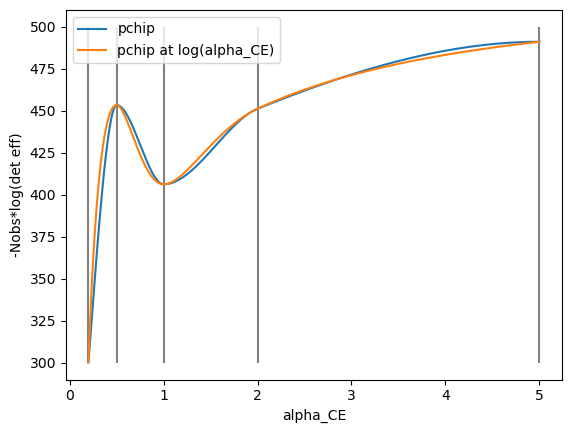

In [13]:
for value in alpha_CE:
    plt.vlines(value,300,500, color='grey')
    
for i, interp_method in enumerate(['pchip']):
     f = RegularGridInterpolator([alpha_CE], np.log(alpha[-1,:]), bounds_error=False, fill_value=None, method=interp_method)
     plt.plot(np.linspace(alpha_CE[0],alpha_CE[-1],500), -69*(f(np.linspace(alpha_CE[0],alpha_CE[-1],500))), label='pchip')

f = RegularGridInterpolator([np.log(alpha_CE)], np.log(alpha[-1,:]), bounds_error=False, fill_value=None, method='pchip')
plt.plot(np.logspace(np.log10(alpha_CE[0]),np.log10(alpha_CE[-1]),500),\
     -69*(f(np.log(np.logspace(np.log10(alpha_CE[0]),np.log10(alpha_CE[-1]),500)))), label='pchip at log(alpha_CE)')

plt.legend()
plt.xlabel('alpha_CE')
plt.ylabel('-Nobs*log(det eff)')

In [29]:
np.logspace(np.log10(alphaCE[0]),np.log10(alphaCE[-1]),500)

array([0.2       , 0.2012943 , 0.20259698, 0.20390808, 0.20522768,
       0.20655581, 0.20789253, 0.20923791, 0.210592  , 0.21195484,
       0.21332651, 0.21470705, 0.21609653, 0.217495  , 0.21890252,
       0.22031915, 0.22174494, 0.22317997, 0.22462428, 0.22607793,
       0.227541  , 0.22901353, 0.23049559, 0.23198724, 0.23348855,
       0.23499957, 0.23652037, 0.23805101, 0.23959156, 0.24114208,
       0.24270263, 0.24427328, 0.2458541 , 0.24744514, 0.24904649,
       0.25065819, 0.25228033, 0.25391296, 0.25555616, 0.25720999,
       0.25887452, 0.26054983, 0.26223598, 0.26393304, 0.26564109,
       0.26736018, 0.26909041, 0.27083182, 0.27258451, 0.27434855,
       0.27612399, 0.27791093, 0.27970943, 0.28151957, 0.28334143,
       0.28517507, 0.28702058, 0.28887804, 0.29074751, 0.29262909,
       0.29452284, 0.29642884, 0.29834718, 0.30027794, 0.30222119,
       0.30417701, 0.30614549, 0.30812672, 0.31012076, 0.31212771,
       0.31414764, 0.31618065, 0.31822681, 0.32028622, 0.32235

In [21]:
chi_b[0]

'0.'

In [6]:
alpha[:,-1]

array([0.00063956, 0.00067522, 0.00070705, 0.00080199])

[0.03515163 0.01995899 0.0558745  0.01704944]
[0.03512317 0.01856798 0.05327991 0.01829783]
[0.03518279 0.01890714 0.04874645 0.01933228]
[0.03773852 0.01813346 0.05031594 0.02389836]


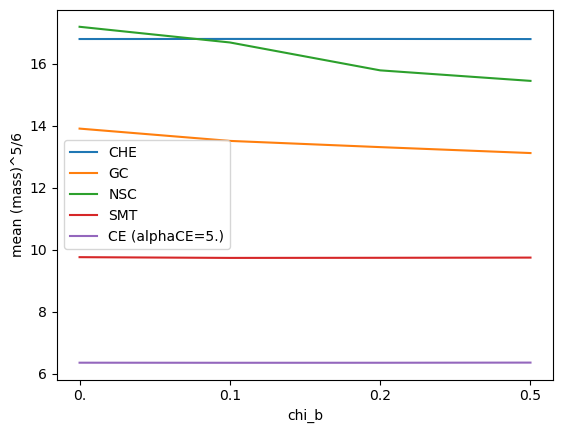

In [8]:
channel_no=0
for channel in channels:
    plt.plot(chi_b, mass_notCE[channel_no,:], label=channels[channel_no])
    print(alpha_notCE[:,channel_no])
    #plt.yscale('log')
    channel_no+=1
plt.plot(chi_b, mass_power[:,-1], label='CE (alphaCE=5.)')
plt.xlabel('chi_b')
plt.ylabel('mean (mass)^5/6')
plt.legend()

[0.03515163 0.01995899 0.0558745  0.01704944]
[0.03512317 0.01856798 0.05327991 0.01829783]
[0.03518279 0.01890714 0.04874645 0.01933228]
[0.03773852 0.01813346 0.05031594 0.02389836]


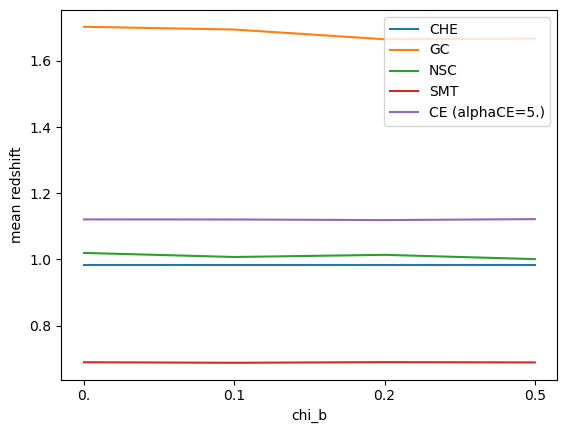

In [16]:
channel_no=0
for channel in channels:
    plt.plot(chi_b, redshift_notCE[channel_no,:], label=channels[channel_no])
    print(alpha_notCE[:,channel_no])
    #plt.yscale('log')
    channel_no+=1
plt.plot(chi_b, redshift[:,-1], label='CE (alphaCE=5.)')
plt.xlabel('chi_b')
plt.ylabel('mean redshift')
plt.legend()

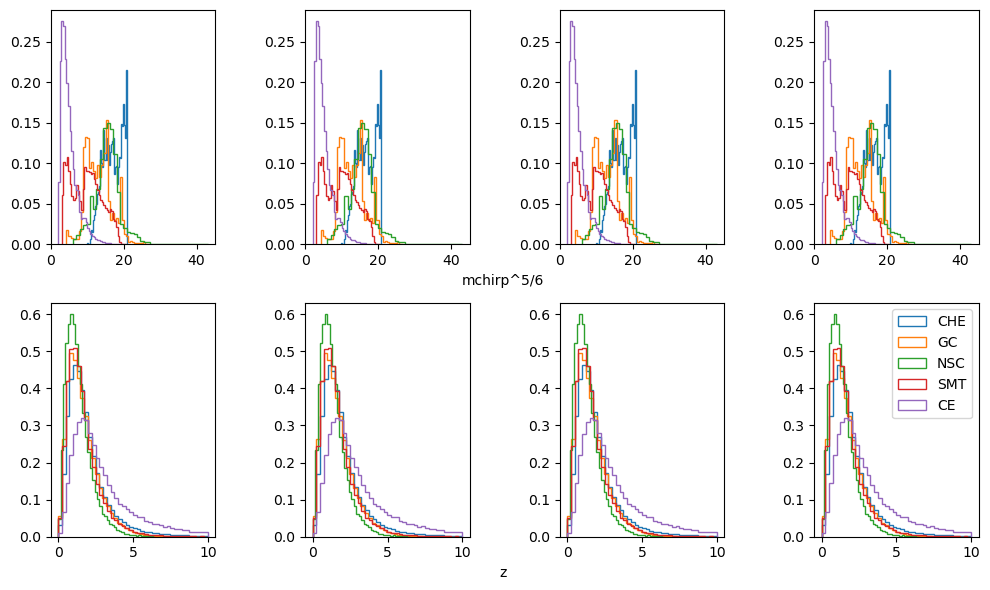

In [33]:
#all channels m_power distr
plt.rcParams["figure.figsize"] = (10,6)
channels = ['CHE','GC','NSC','SMT','CE']

channel_no = 0

fig, ax = plt.subplots(2,4)

for channel in channels:
        samples_dict = read_models.read_hdf5(file_path, channel)
        if channel=='CE':
                samples = samples_dict[(chib_id,alphaCE_id)]
        else:
                samples = samples_dict[(chib_id)]
        for chib_id in range(4):
            #mock_samp = samples.sample(int(1e6), weights=(samples['weight']/len(samples)), replace=True)
            #alpha_notCE[channel_no,chib_id] = np.sum(mock_samp['pdet_'+sensitivity]) / len(mock_samp)
            ax[0,chib_id].hist(samples['mchirp']**(5/6), weights=samples['weight']/len(samples), bins=40, density=True,\
                label=channel, alpha=1., histtype='step')
            ax[1,chib_id].hist(samples['z'], weights=samples['weight']/len(samples), bins=40, density=True,\
                label=channel, alpha=1., histtype='step')
            
        channel_no+=1
ax[0,1].set_xlabel('mchirp^5/6', x=1.2)
ax[1,1].set_xlabel('z', x=1.2)
plt.legend()
plt.tight_layout()

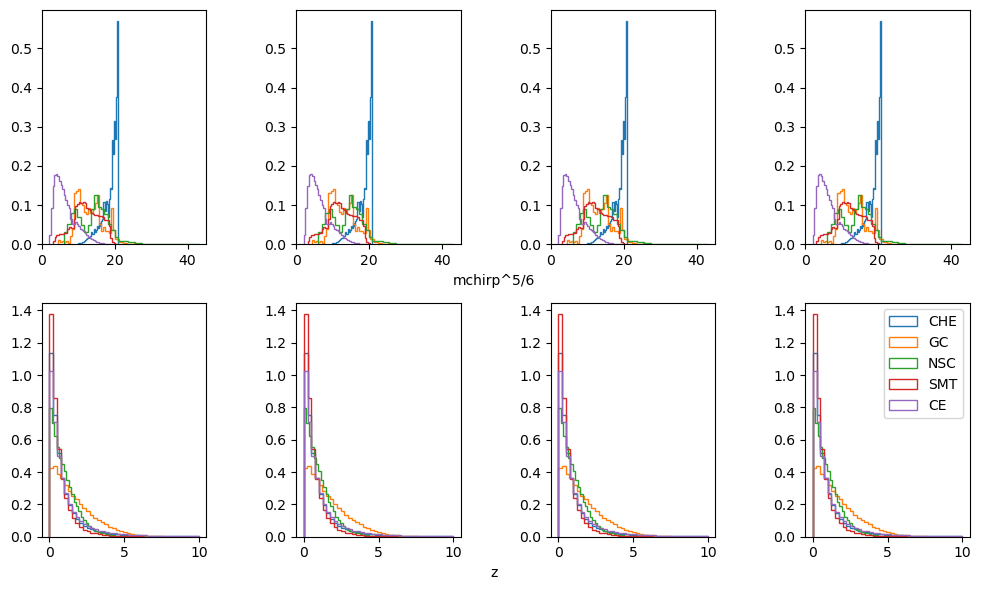

In [34]:
#all channels m_power distr
plt.rcParams["figure.figsize"] = (10,6)
channels = ['CHE','GC','NSC','SMT','CE']

channel_no = 0

fig, ax = plt.subplots(2,4)

for channel in channels:
        samples_dict = read_models.read_hdf5(file_path, channel)
        if channel=='CE':
                samples = samples_dict[(chib_id,alphaCE_id)]
        else:
                samples = samples_dict[(chib_id)]
        for chib_id in range(4):
            #mock_samp = samples.sample(int(1e6), weights=(samples['weight']/len(samples)), replace=True)
            #alpha_notCE[channel_no,chib_id] = np.sum(mock_samp['pdet_'+sensitivity]) / len(mock_samp)
            ax[0,chib_id].hist(samples['mchirp']**(5/6), bins=40, density=True,\
                label=channel, alpha=1., histtype='step')
            ax[1,chib_id].hist(samples['z'], bins=40, density=True,\
                label=channel, alpha=1., histtype='step')
            
        channel_no+=1
ax[0,1].set_xlabel('mchirp^5/6', x=1.2)
ax[1,1].set_xlabel('z', x=1.2)
plt.legend()
plt.tight_layout()